# Week 4:  Text Classification Project
## NLP - Naive Bayes (Lyrics from Songs)

### Table of Contents
1. Objective of the Project
2. Data Collection
    - Download HTML File
    - Getting list of urls
    -Extracing lyrics from songs
3. Preprocessing of Data (Bag of Words, Tokenization and Vectorization)
    - Analyzing Data
    - Build a count vectorizer
    - Sparse Matrix
    - TF-Idf Vectors
4. Modelling with Naive Bayes Classifier
    - Compute IDF
    - Compute Score
    - Train Test Split
    - Calculating accuracy and generating classification report from test data
    - Predicting Another Song
5. Modelling with Other Classifiers
    - Logistic Regression
    - Decision Tree
    - Random Forest 
6. Word Cloud




### 1. Objective of the Project

The goal of this project is to test whether Naive Bayer classifier (and also other classifier) can successfully predict the Artist, based on the lyrics of their songs. Two artists are deliberately choosen to separate the classification problem according to the music they made. 

![sheeran](sheeran2.jpg)


source: https://wallpapersafari.com/ed-sheeran-lyrics-wallpaper/


### 2. Data Collection

Importing Libraries

In [1]:
import os
from os import path
import re
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import  MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Downloading the HTML File

In [2]:
base_url='https://www.azlyrics.com'
path = 'songs/'
lyrics_path = path + 'lyrics/'

In [3]:
def load_file(filename):
    with open(filename,'r') as file:
        return file.read()

In [4]:
def create_link_list(filename,link_list_filename):
    lyrics = load_file(path + filename)
    soup = BeautifulSoup(lyrics, 'html.parser')
    rows = soup.body.find_all(class_='listalbum-item')
    links = []
    for div in rows:
        if "listalbum-item" in div.get("class", []):
            for item in div.find_all('a', href=True):
                links.append(base_url + item['href'][2:])
    with open(path + link_list_filename,"w") as file:
        for link in links:
            file.write(link+"\n")

In [5]:
create_link_list('azsheeran.html','sheeranlinks.txt')

In [6]:
create_link_list('azmetallica.html','metallicalinks.txt')

### 3. Preprocessing of Data 

In [7]:
def load_song(filename):
    song_page=""
    with open(lyrics_path + filename, "r") as file:
        song_page = file.read().encode('utf8')
    song_soup = BeautifulSoup(song_page, 'html.parser')
    label = song_soup.find(class_="ringtone")
    return label.find_next_sibling('div').text.strip().replace('\n',' ').replace('â€™',"'")

In [8]:
corpus = []
titles = []

for filename in os.listdir(lyrics_path):
    corpus.append(load_song(filename))
    titles.append(filename.split('.')[1])
    
#corpus

In [9]:
titles

['amievil',
 'hitthelights',
 'jumpinthefire',
 'metalmilitia',
 'motorbreath',
 'noremorse',
 'phantomlord',
 'seekdestroy',
 'thefourhorsemen',
 'whiplash',
 'addicted',
 'beyondthepale',
 'iloveyou',
 'inmemory',
 'insomniacslullaby',
 'misery',
 'moodyballadofed',
 'openyourears',
 'quietballadofed',
 'typicalaverage']

In [10]:
model = spacy.load('en_core_web_sm')

In [11]:
model

In [12]:
def clean_lyrics(lyrics):
    word_list = re.findall('\w+',lyrics)
    worded_lyrics = ' '.join(word_list)
    tokenised_lyrics = model(worded_lyrics)
    clean_lyrics = []
    for token in tokenised_lyrics:
        if not token.is_stop:
            clean_lyrics.append(token.lemma_)
    super_clean_lyrics = []
    for word in clean_lyrics:
        if len(word) > 2:
            super_clean_lyrics.append(word)
    return ' '.join(super_clean_lyrics)

In [13]:
clean_corpus = []
for song in corpus:
    clean_corpus.append(clean_lyrics(song))

Build a count vectorizer

In [14]:
cv = CountVectorizer()
cv.fit(clean_corpus)

CountVectorizer()

In [15]:
vec_corpus = cv.transform(clean_corpus)
vec_corpus

<20x528 sparse matrix of type '<class 'numpy.int64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [16]:
vec_corpus.todense()

matrix([[0, 0, 1, ..., 1, 8, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

Sparse Matrix

In [17]:
df = pd.DataFrame(vec_corpus.todense(), columns=cv.get_feature_names(),index=titles)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, amievil to typicalaverage
Data columns (total 528 columns):
 #   Column         Dtype
---  ------         -----
 0   abuse          int64
 1   acting         int64
 2   action         int64
 3   addicted       int64
 4   adrenaline     int64
 5   affect         int64
 6   alive          int64
 7   alright        int64
 8   analyze        int64
 9   angel          int64
 10  aren           int64
 11  armor          int64
 12  army           int64
 13  ass            int64
 14  attack         int64
 15  attention      int64
 16  avenge         int64
 17  average        int64
 18  await          int64
 19  away           int64
 20  baby           int64
 21  bad            int64
 22  bag            int64
 23  bang           int64
 24  bear           int64
 25  befall         int64
 26  bell           int64
 27  belong         int64
 28  bitch          int64
 29  blade          int64
 30  blame          int64
 31  bleed          int64

 Tf-Idf Vectors

In [18]:
df['feel']

amievil              0
hitthelights         0
jumpinthefire        0
metalmilitia         0
motorbreath          0
noremorse            2
phantomlord          0
seekdestroy          0
thefourhorsemen      0
whiplash             0
addicted             0
beyondthepale        1
iloveyou             1
inmemory             1
insomniacslullaby    0
misery               0
moodyballadofed      0
openyourears         3
quietballadofed      4
typicalaverage       0
Name: feel, dtype: int64

In [19]:
tf = TfidfTransformer()
tf.fit(vec_corpus)

TfidfTransformer()

In [20]:
tf_corpus = tf.transform(vec_corpus)

In [21]:
df2 = pd.DataFrame(tf_corpus.todense(),  columns=cv.get_feature_names(), index=titles)
df2

,abuse,acting,action,addicted,adrenaline,affect,alive,alright,analyze,angel,...,work,world,wouldn,wound,wrap,write,wrong,yeah,yes,young
amievil,0.000000,0.000000,0.055086,0.000000,0.000000,0.000000,0.055086,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.055086,0.000000,0.000000,0.000000,0.048422,0.440692,0.000000
hitthelights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061583,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
jumpinthefire,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
metalmilitia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.045515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
motorbreath,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
noremorse,0.051228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
phantomlord,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
seekdestroy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036889,0.000000,0.000000,...,0.000000,0.030492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
thefourhorsemen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060161,0.000000,0.000000,0.068442
whiplash,0.000000,0.307464,0.000000,0.000000,0.307464,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Effect of tfidf

In [22]:
df2['world']

amievil              0.000000
hitthelights         0.000000
jumpinthefire        0.000000
metalmilitia         0.045515
motorbreath          0.000000
noremorse            0.000000
phantomlord          0.000000
seekdestroy          0.030492
thefourhorsemen      0.000000
whiplash             0.000000
addicted             0.000000
beyondthepale        0.075724
iloveyou             0.000000
inmemory             0.000000
insomniacslullaby    0.000000
misery               0.000000
moodyballadofed      0.000000
openyourears         0.068332
quietballadofed      0.000000
typicalaverage       0.000000
Name: world, dtype: float64

In [23]:
df.sum(axis=1)

amievil              124
hitthelights          71
jumpinthefire         75
metalmilitia          86
motorbreath           68
noremorse            128
phantomlord           92
seekdestroy          118
thefourhorsemen      119
whiplash             104
addicted              27
beyondthepale         60
iloveyou              64
inmemory              51
insomniacslullaby     93
misery                80
moodyballadofed       49
openyourears          49
quietballadofed       95
typicalaverage        51
dtype: int64

### 4. Modelling with Naive Bayes Classifier

In [24]:
cvect = CountVectorizer(stop_words='english')
word_count = cvect.fit_transform(corpus)
word_count.shape 

(20, 628)

Compute IDF

In [25]:
tfidf_tran = TfidfTransformer()
tfidf_tran.fit(word_count)
idf_df = pd.DataFrame(tfidf_tran.idf_, index=cvect.get_feature_names(), columns=["idf_weights"])
idf_df.sort_values(by=["idf_weights"])

,idf_weights
know,1.271934
don,1.646627
ve,1.741937
time,1.847298
come,1.847298
...,...
heir,3.351375
heart,3.351375
heard,3.351375
heads,3.351375


Compute TFIDF score (Term Frequency Inverse Document Frequency)

In [26]:
tfidf_mat=tfidf_tran.transform(word_count)
tfidf_mat

<20x628 sparse matrix of type '<class 'numpy.float64'>'
	with 956 stored elements in Compressed Sparse Row format>

In [27]:
tfidf_mat_dense = tfidf_mat.todense()
tfidf_mat_dense

matrix([[0.        , 0.        , 0.0522041 , ..., 0.0458882 , 0.41763277,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.0588825 , 0.        ,
         0.        ]])

In [28]:
tfidf_df = pd.DataFrame(tfidf_mat_dense, columns=cvect.get_feature_names(),index=titles)
tfidf_df

,abuse,acting,action,addicted,adrenaline,affected,alive,alright,analyze,angels,...,wouldn,wounds,wrapped,write,wrong,wrote,ya,yeah,yes,young
amievil,0.00000,0.000000,0.052204,0.000000,0.000000,0.000000,0.052204,0.000000,0.000000,0.000000,...,0.000000,0.052204,0.000000,0.0000,0.000000,0.000000,0.052204,0.045888,0.417633,0.000000
hitthelights,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055878,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
jumpinthefire,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
metalmilitia,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
motorbreath,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
noremorse,0.04918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
phantomlord,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
seekdestroy,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034632,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
thefourhorsemen,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.059705,0.000000,0.000000,0.000000,0.000000,0.067922
whiplash,0.00000,0.288335,0.000000,0.000000,0.288335,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Train Test Split

In [29]:
artist = ['metallica'] * 10 + ['sheeran'] * 10

In [30]:
X = tfidf_mat_dense
y = np.array(artist)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [85]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10, 628), (10, 628), (10,), (10,))

In [86]:
mnb_model = MultinomialNB(alpha=0.01)
mnb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

In [87]:
y_pred = mnb_model.predict(X_test)

In [88]:
y_pred

array(['metallica', 'metallica', 'sheeran', 'metallica', 'metallica',
       'metallica', 'sheeran', 'metallica', 'sheeran', 'sheeran'],
      dtype='<U9')

Calculating accuracy and generating classification report from test data

In [89]:
score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, y_pred, target_names=['Metallica','Sheeran']))

print("confusion matrix:")
con_mat = metrics.confusion_matrix(y_test, y_pred)
print(con_mat)

accuracy:   0.900
              precision    recall  f1-score   support

   Metallica       0.83      1.00      0.91         5
     Sheeran       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

confusion matrix:
[[5 0]
 [1 4]]


Text(33.0, 0.5, 'Actual')

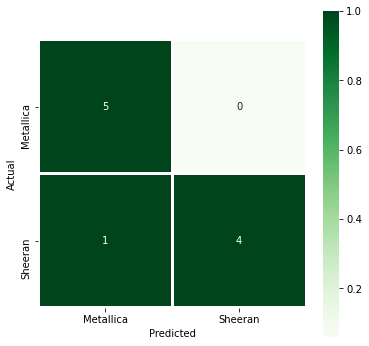

In [90]:
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(con_mat, annot=True,  cbar=True, \
                cmap = 'Greens', vmax = 1,\
               xticklabels=['Metallica', 'Sheeran'],\
                yticklabels=['Metallica', 'Sheeran'],\
                linecolor='white',\
               linewidth=2, square = True, fmt = '.0f', robust = True); 
plt.xlabel('Predicted')
plt.ylabel('Actual')


Predicting another song

In [91]:
new_song = "When your legs don't work like they used to before And I can't sweep you off of your feet Will your mouth still remember the taste of my love Will your eyes still smile from your cheeks "

In [92]:
new_song_vect = cvect.transform([new_song]).todense()
new_song_tfidf = tfidf_tran.transform(new_song_vect).todense()
mnb_model.predict(new_song_tfidf)

array(['sheeran'], dtype='<U9')

In [93]:
new_song2 = "Make his fight on the hill in the early day Constant chill deep inside Shouting gun, on they run through the endless grey On they fight, for the right, yes, but who's to say? For a hill men would kill, why? They do not know Stiffened wounds test their pride Men of five, still alive through the raging glow Gone insane from the pain that they surely know"

In [94]:
new_song_vect = cvect.transform([new_song2]).todense()
new_song_tfidf = tfidf_tran.transform(new_song_vect).todense()
mnb_model.predict(new_song_tfidf)

array(['sheeran'], dtype='<U9')

### 5. Using Other Classification Models

In [95]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

model_names=['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']


accuracy=[]
d={}

for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))
    
d={'Model Names':model_names, 'Accuracy' :accuracy}
data = pd.DataFrame(d).sort_values(by='Accuracy', ascending=False)
data

,Model Names,Accuracy
2,Random Forest Classifier,1.0
0,Logistic Regression,0.8
1,Decision Tree Classifier,0.8


### 6. Word Cloud

In [96]:
clean_sheeran_corpus = clean_corpus.copy()[10:20]

In [97]:
corpus1 = clean_sheeran_corpus 

<Figure size 432x288 with 0 Axes>

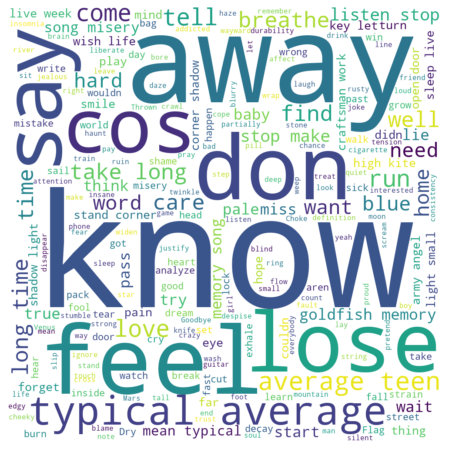

<Figure size 432x288 with 0 Axes>

In [98]:
text = " ".join(corpus1)
stopwords = set(STOPWORDS)


wc = WordCloud(background_color="white", 
    width = 1000, 
    height = 1000, 
    max_words=2000, 
    stopwords=stopwords, 
    contour_width=3, 
    contour_color='steelblue')

wc.generate(text)

plt.figure(figsize = (8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()


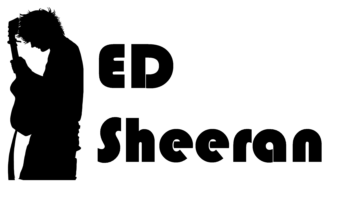

<Figure size 432x288 with 0 Axes>

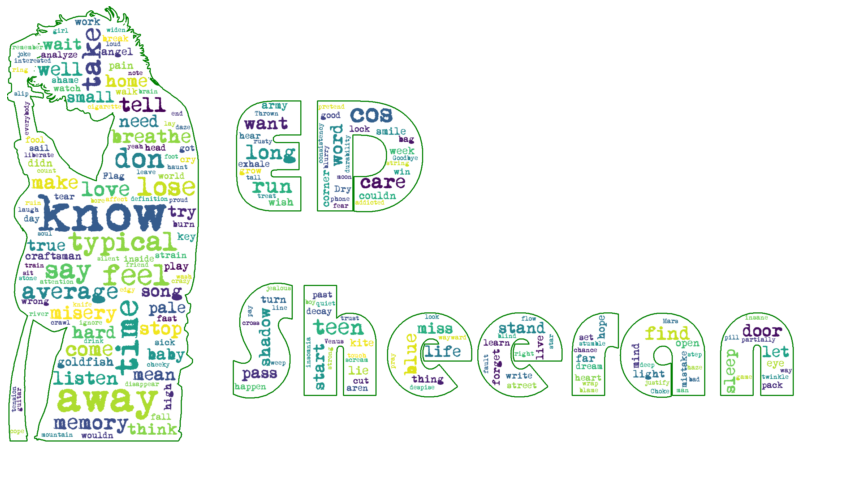

<Figure size 432x288 with 0 Axes>

In [99]:
#text = " ".join(corpus1)
ed_mask = np.array(Image.open("ed1.png"))
stopwords = set(STOPWORDS)
font = 'Mom.ttf'

wc = WordCloud(font_path = font,
    background_color='white', 
    max_words=2000, 
    mask=ed_mask,
    stopwords=stopwords,
    collocations=False,
    contour_width=3, 
    contour_color='green')

wc.generate(text)

plt.imshow(ed_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

plt.figure(figsize = (15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()


In [100]:
clean_metallica_corpus = clean_corpus.copy()[0:9]

In [101]:
corpus2 = clean_metallica_corpus

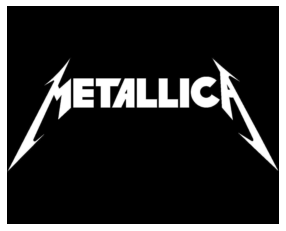

<Figure size 432x288 with 0 Axes>

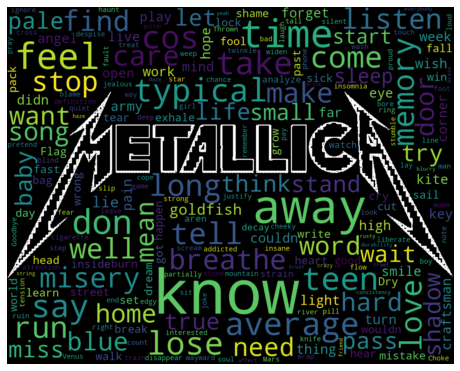

<Figure size 432x288 with 0 Axes>

In [102]:
text2 = " ".join(corpus2)
metal_mask = np.array(Image.open("metallica3.jpg"))
stopwords = set(STOPWORDS)

wc2 = WordCloud(background_color='black', 
    max_words=2000, 
    mask=metal_mask,
    stopwords=stopwords,
    collocations=False,
    contour_width=3, 
    contour_color='white')

wc2.generate(text)

plt.imshow(metal_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.figure()
